## Analysis of Portenga and Bierman (2011) supplementary data

In [211]:
import pandas as pd
import os
import numpy as np
folder ='/Users/gr_1/Documents/cosmo_predict/'
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## step 1 Load excel sheet, look at basin averaged rates (sheets 4 - 12), concatenate

In [212]:

a = pd.DataFrame()
for i in range(4,12):
    b = pd.read_excel(folder + 'rates_cosmo.xlsx',sheet_name = i)
    a = a.append(b)
a.index = range(0,len(a))

<ipython-input-212-202591e94c92>:3: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  b = pd.read_excel(folder + 'rates_cosmo.xlsx',sheet_name = i)


## Some of the data labels are messed up, correct

In [213]:
for col in a.columns:
    for i in range(len(a)):
        if len(str(a[col][i:i+1].values[0]).split("\n"))>1:
            a.loc[i,col] = str(a[col][i:i+1].values[0]).split('\n')[0]
    if 'Unnamed' in str(col):
        a = a.drop(col,1)
for s in range(len(a)):
    a.loc[s,'Climate Zone (Sub-category)'] = str(a.loc[s,'Climate Zone (Sub-category)']).lower()

## Want to discretize continuous data for the seaborn box plots

In [128]:
a_discrete = pd.DataFrame()
for col in a.columns:
    try:
        cval = pd.to_numeric(a[col],errors='coerce')
        a_discrete[col+' binned'] = pd.cut(cval,bins = np.arange(min(cval),max(cval),(max(cval)-min(cval))/8))
        a_discrete[col+' binned'] = pd.cut(cval,bins = np.arange(min(cval),max(cval),(max(cval)-min(cval))/4))

    except:
        a_discrete[col] = a[col]
    
a_discrete['CRONUS Erosion Rate (m My)'] = pd.to_numeric(a['CRONUS Erosion Rate (m My)'],errors='coerce')



## Box plots of excel variables vs. Cronus erosion rates

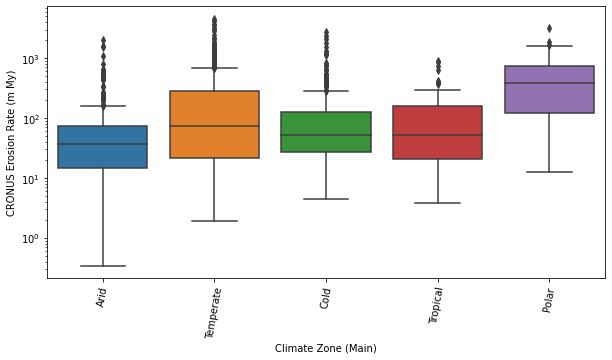

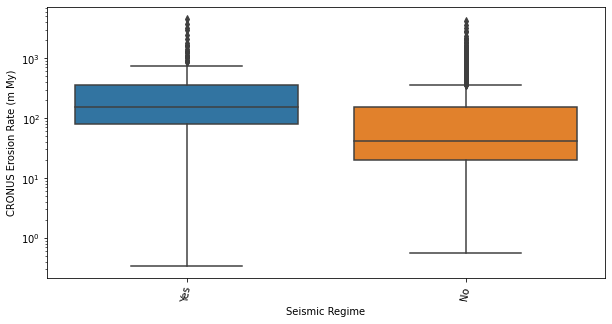

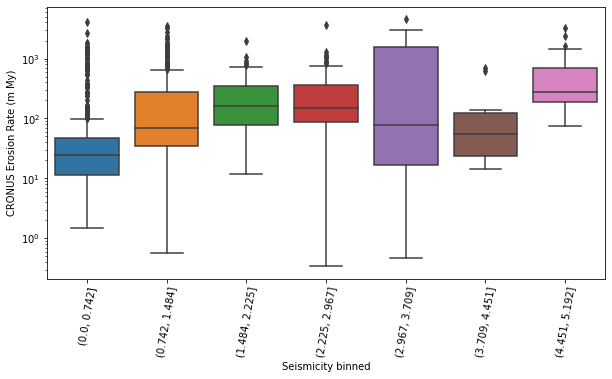

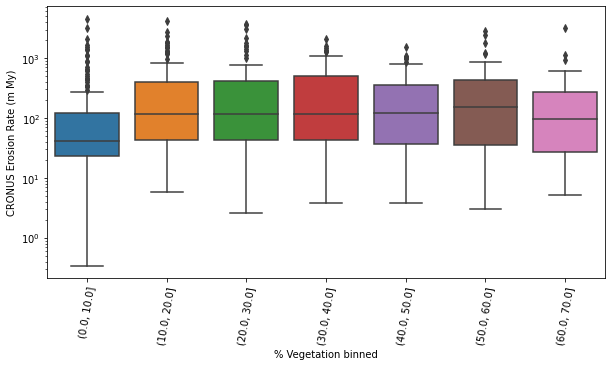

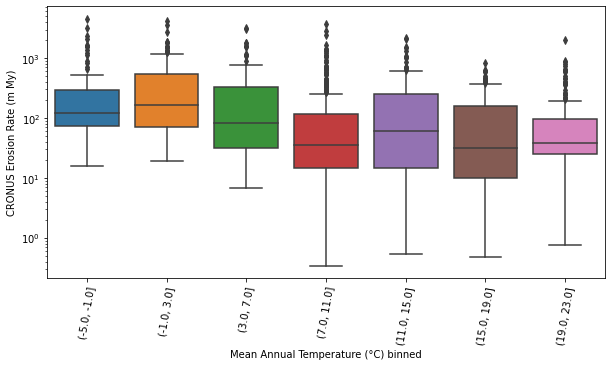

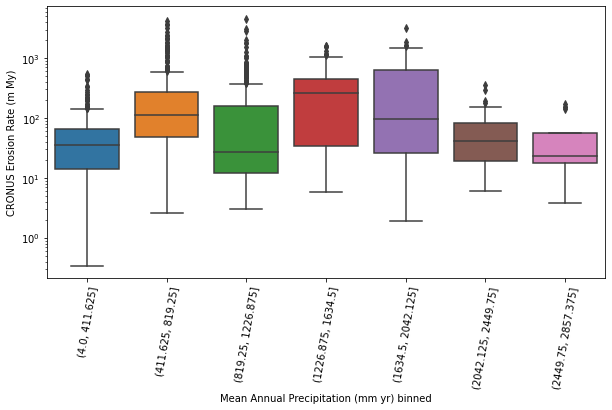

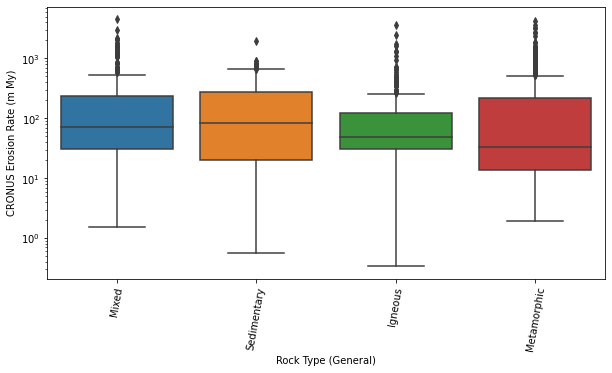

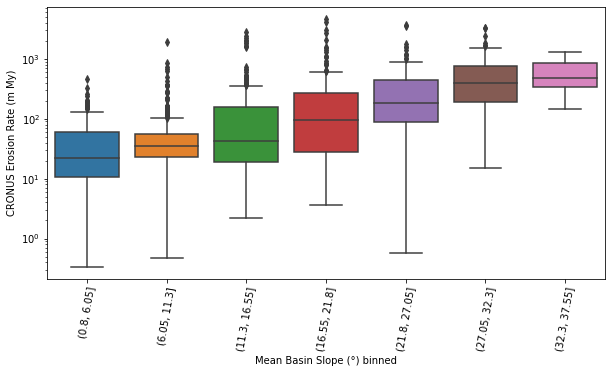

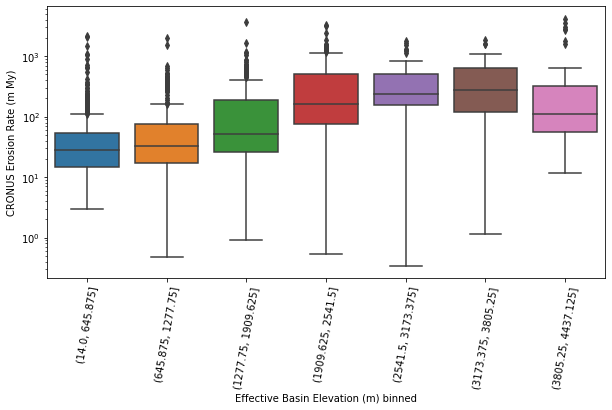

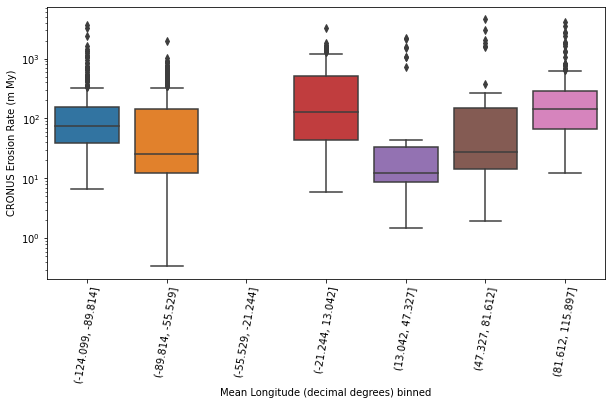

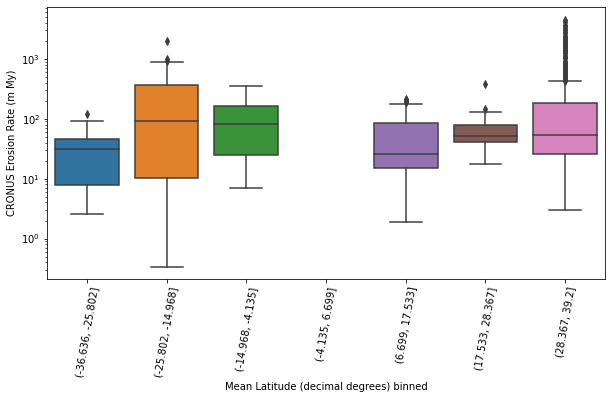

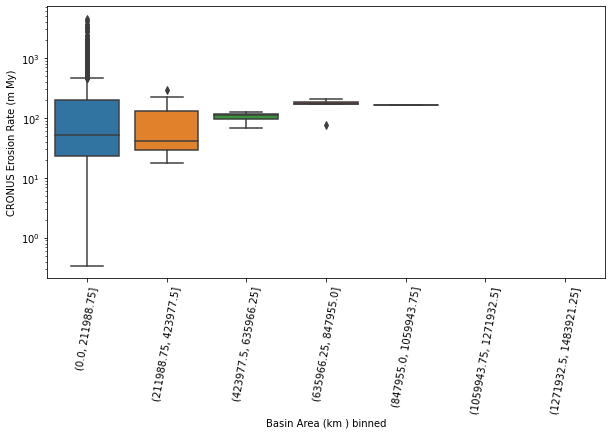

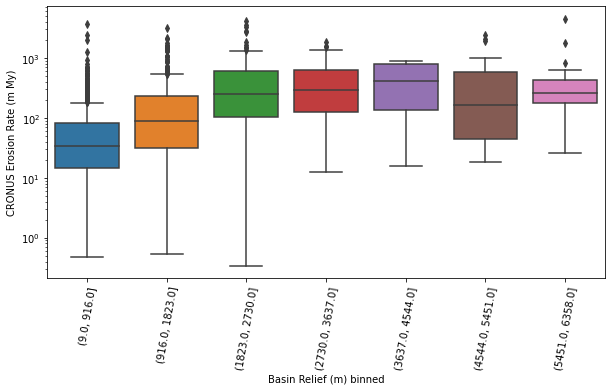

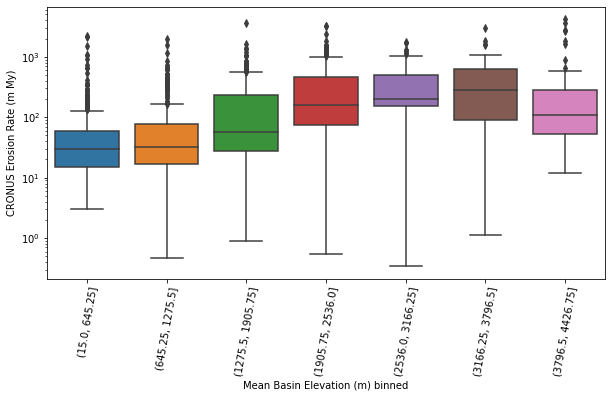

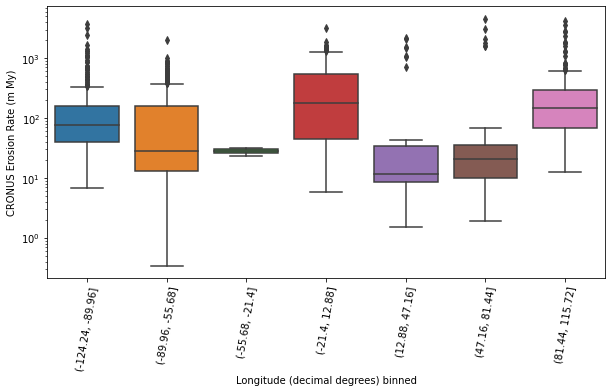

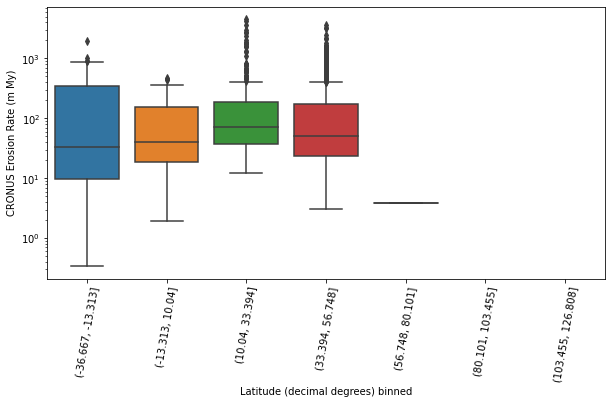

In [108]:
c = 0
for col in np.flip(a_discrete.columns[3:-5]):
    
    fig_ax = plt.subplots(figsize=(10,5))
    g = sns.boxplot(data = a_discrete,y='CRONUS Erosion Rate (m My)',x=col)
    plt.xticks(rotation=80)
    g.set_yscale('log')
    c += 1

In [113]:
a_rf

,Mean Basin Elevation (m),Basin Relief (m),Basin Area (km ),Effective Basin Elevation (m),Mean Basin Slope (°),Rock Type (General),Mean Annual Precipitation (mm yr),Mean Annual Temperature (°C),% Vegetation,Seismicity,Seismic Regime,Climate Zone (Main),CRONUS Erosion Rate (m My)
0,3076.0,141.0,1.14,3076.0,7.2,2,735.0,12.0,5.0,2.916137,Yes,Arid,0.841985
1,2080.0,2286.0,93.88,2160.0,20.1,2,815.0,17.0,9.0,2.916137,Yes,Arid,2.107990
2,1671.0,3078.0,153.99,1806.0,20.8,2,716.0,18.0,9.0,2.904053,Yes,Arid,2.101369
3,1438.0,3250.0,186.69,1630.0,19.2,2,639.0,19.0,9.0,2.904053,Yes,Arid,2.086751
4,1394.0,3264.0,192.97,1598.0,18.6,2,626.0,19.0,9.0,2.904053,Yes,Arid,1.951969
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,1392.0,2101.0,1652.70,1437.0,18.0,2,799.0,20.0,76.0,1.222435,No,Arid,2.648789
1374,1392.0,2101.0,1652.70,1437.0,18.0,2,799.0,20.0,76.0,1.222435,No,Arid,2.772248
1375,2518.0,4745.0,59026.80,2709.0,14.0,2,665.0,16.0,32.0,1.915698,No,Temperate,2.779676
1376,2418.0,4382.0,4950.91,2701.0,21.5,2,1704.0,16.0,33.0,1.841031,No,Temperate,2.393628


In [ ]:
## Temporary for bruce

In [206]:
a_rf = pd.DataFrame()
for col in a.columns[3:-4]:
    try:
        #if ('Latitude' in col) | ('Longitude' in col):
            #continue
        cval = pd.to_numeric(a[col],errors='coerce')

        pd.cut(cval,bins = np.arange(min(cval),max(cval),(max(cval)-min(cval))/8))
        a_rf[col] = cval
   
    except Exception as e:
        le = sklearn.preprocessing.LabelEncoder()
        le.fit(a[col].astype('str').values)
        l = le.transform(a[col].astype('str').values) 
        a_rf[col] = l

    
a_rf['CRONUS Erosion Rate (m My)'] = pd.to_numeric(a['CRONUS Erosion Rate (m My)'],errors='coerce')

a_rf = a_rf.drop(np.where(a['Mean Basin Elevation (m)'].isna())[0])

<ipython-input-207-2be363648042>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_rf['loc'][np.logical_and(np.logical_and(a_rf['Latitude (decimal degrees)'] > 30, a_rf['Latitude (decimal degrees)'] < 60), np.logical_and(a_rf['Longitude (decimal degrees)']
<ipython-input-207-2be363648042>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_rf['loc'][np.logical_and(np.logical_and(a_rf['Latitude (decimal degrees)'] > 30, a_rf['Latitude (decimal degrees)'] < 60), np.logical_and(a_rf['Longitude (decimal degrees)']


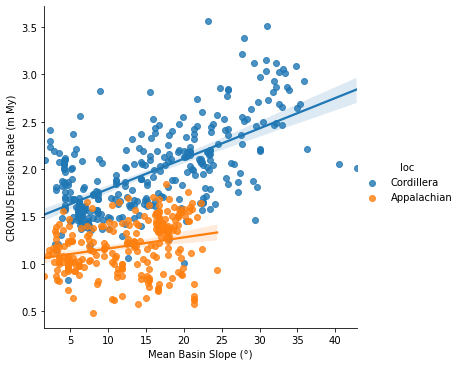

In [207]:
a_rf['loc'] = 'non'
a_rf['loc'][np.logical_and(np.logical_and(a_rf['Latitude (decimal degrees)'] > 30, a_rf['Latitude (decimal degrees)'] < 60), np.logical_and(a_rf['Longitude (decimal degrees)']
                           < -100, a_rf['Longitude (decimal degrees)'] > -150 ))] = 'Cordillera'

a_rf['loc'][np.logical_and(np.logical_and(a_rf['Latitude (decimal degrees)'] > 30, a_rf['Latitude (decimal degrees)'] < 60), np.logical_and(a_rf['Longitude (decimal degrees)']
                           < -40, a_rf['Longitude (decimal degrees)'] > -100 ))] = 'Appalachian'


col ='Mean Annual Precipitation (mm yr)'
cval = a_rf['Mean Annual Precipitation (mm yr)']
a_discrete[col+' binned'] = pd.cut(cval,bins = (0,500,1000,2000))

a_rf['Climate Zone (Main)'] = a['Climate Zone (Main)']
a_rf['Seismic Regime'] = a['Seismic Regime']
a_rf['Mean Annual Precipitation (mm yr)'] = a_discrete['Mean Annual Precipitation (mm yr) binned']
a_rf['Mean Annual Precipitation (mm yr)'] = a_discrete['Mean Annual Precipitation (mm yr) binned']

a_rf['CRONUS Erosion Rate (m My)'] = np.log10(a_rf['CRONUS Erosion Rate (m My)'])
#a_rf['Mean Basin Slope (°)'] = np.float64(a_rf['Mean Basin Slope (°)'])
a_rf = a_rf.drop(a_rf.index[a_rf['loc'] == 'non'])
ax= sns.lmplot(data=a_rf,x='Mean Basin Slope (°)',y='CRONUS Erosion Rate (m My)',hue = 'loc')


#ax.set(yscale="log")


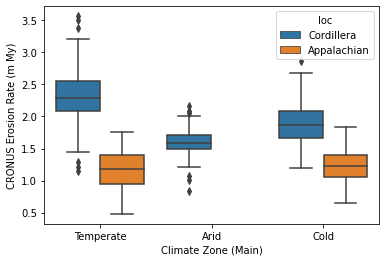

In [208]:
ax= sns.boxplot(data=a_rf,x='Climate Zone (Main)',y='CRONUS Erosion Rate (m My)',hue = 'loc')


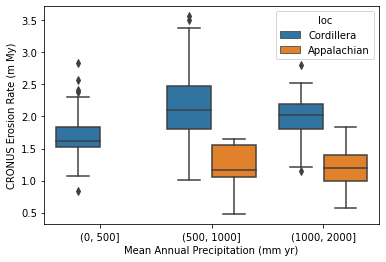

In [209]:
ax= sns.boxplot(data=a_rf,x='Mean Annual Precipitation (mm yr)',y='CRONUS Erosion Rate (m My)',hue = 'loc')


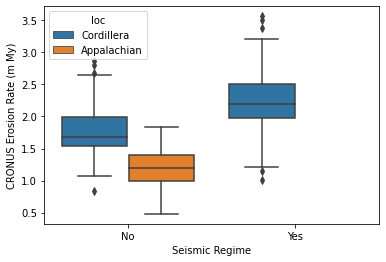

In [210]:
ax= sns.boxplot(data=a_rf,x='Seismic Regime',y='CRONUS Erosion Rate (m My)',hue = 'loc')


## Random forest regression

In [51]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVR
from sklearn import impute
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

## Data prep

In [62]:
a_rf['dist'] = (a_rf['Longitude (decimal degrees)']**2 + a_rf['Latitude (decimal degrees)']**2)
#a = a.sort_values('dist')

KeyError: 'Longitude (decimal degrees)'

In [27]:
a['dist_bin'] = pd.cut(a['Longitude (decimal degrees)'],3600)

In [28]:
a2 = pd.DataFrame()
for i,data in a.groupby('dist_bin'):  
    if len(data) > 0:
        a2 = a2.append(data.mean(),ignore_index=True)
        for col in a.columns:
            if (a[col].dtype != np.number):
                a2[col] = data.iloc[0][col]

<ipython-input-28-449270694aec>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if (a[col].dtype != np.number):


In [130]:
a_rf = pd.DataFrame()
for col in a.columns[3:-4]:
    try:
        if ('Latitude' in col) | ('Longitude' in col):
            continue
        cval = pd.to_numeric(a[col],errors='coerce')

        pd.cut(cval,bins = np.arange(min(cval),max(cval),(max(cval)-min(cval))/8))
        a_rf[col] = cval
   
    except Exception as e:
        le = sklearn.preprocessing.LabelEncoder()
        le.fit(a[col].astype('str').values)
        l = le.transform(a[col].astype('str').values) 
        a_rf[col] = l

    
a_rf['CRONUS Erosion Rate (m My)'] = pd.to_numeric(a['CRONUS Erosion Rate (m My)'],errors='coerce')

a_rf = a_rf.drop(np.where(a['Mean Basin Elevation (m)'].isna())[0])

In [61]:
a_rf = a_rf.sample(frac=1)

# Cross validation - test dataset vs estimate with random forests

Cross-validation # 0
Median error =  13.7821724634168
r2 =  0.6986619501584287
Cross-validation # 1
Median error =  12.863266328305128
r2 =  0.6728880486584021
Cross-validation # 2
Median error =  14.16760584378406
r2 =  0.8246474727108055


<ipython-input-56-5e52b938a9b0>:72: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0 ,1000])
<ipython-input-56-5e52b938a9b0>:73: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0 ,1000])
<ipython-input-56-5e52b938a9b0>:72: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0 ,1000])
<ipython-input-56-5e52b938a9b0>:73: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0 ,1000])
<ipython-input-56-5e52b938a9b0>:72: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0 ,1000])
<ipython-input-56-5e52b938a9b0>:73: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0 ,1000])


Cross-validation # 3
Median error =  12.343164184064108
r2 =  0.6902925470988878
Cross-validation # 4
Median error =  13.875247562044532
r2 =  0.7621586826006067
0.7297297402454261
13.406291276322927


<ipython-input-56-5e52b938a9b0>:72: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0 ,1000])
<ipython-input-56-5e52b938a9b0>:73: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0 ,1000])
<ipython-input-56-5e52b938a9b0>:72: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0 ,1000])
<ipython-input-56-5e52b938a9b0>:73: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0 ,1000])


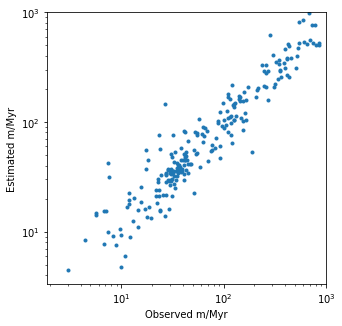

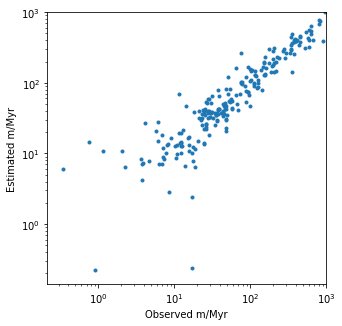

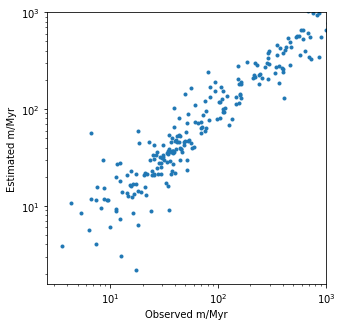

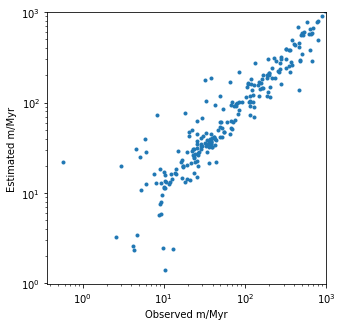

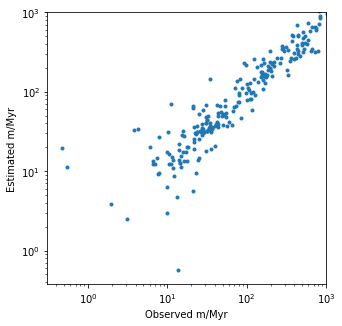

In [56]:
selected_vars = ['Mean Basin Elevation (m)','Basin Relief (m)',
                'Climate Zone (Main)','Mean Basin Slope (°)','Mean Annual Precipitation (mm yr)',
                'Mean Annual Temperature (°C)','Seismicity','Seismic Regime']
#selected_vars = ['Mean Basin Slope (°)']
predictors = a_rf.drop('CRONUS Erosion Rate (m My)',1)
targets = a_rf['CRONUS Erosion Rate (m My)']
predictors.index = range(len(predictors))
targets.index = range(len(predictors))

select = False
ero_thres = False
if select:
    predictors = predictors[selected_vars]
if ero_thres:
    
        drop_rows = np.where((targets>1000)|(targets<10))[0]
        for drop_row in drop_rows:
            predictors = predictors.drop(drop_row)
            targets = targets.drop(drop_row)

model = SVR(kernel = 'rbf',C=700)#max_depth=50,criterion='mse',bootstrap = 'True',min_samples_split=50)
seed = 5
cv = model_selection.KFold(n_splits=5)
a_rf.index = range(len(a_rf))
c=0
mnr2=0
mnmn =0
for train_index, test_index in cv.split(predictors):
    X_train, X_test = predictors.iloc[train_index].values, predictors.iloc[test_index].values
    X_train[X_train>5000000] = np.nan
    y_train, y_test = targets.iloc[train_index].values, targets.iloc[test_index].values
    y_train,y_test = y_train.reshape(-1,1),y_test.reshape(-1,1)
    #y_train[y_train>500] = 500

    imp = impute.SimpleImputer(missing_values=np.nan, strategy='mean')
    imp.fit(X_train)
    X_train = imp.transform(X_train)
    imp = impute.SimpleImputer(missing_values=np.nan, strategy='mean')
    imp.fit(X_test)
    X_test = imp.transform(X_test)
    imp = impute.SimpleImputer(missing_values=np.nan, strategy='mean')
    imp.fit(y_train)
    y_train = imp.transform(y_train).ravel()
    imp = impute.SimpleImputer(missing_values=np.nan, strategy='mean')
    imp.fit(y_test)
    y_test = imp.transform(y_test).ravel()
    # For training, fit() is used
    scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
    X_train = scaling.transform(X_train)
    X_test = scaling.transform(X_test)
    model.fit(X_train, y_train)

    # Default metric is R2 for regression, which can be accessed by score()
    model.score(X_test, y_test)

    # For other metrics, we need the predictions of the model
    y_pred = model.predict(X_test)
    fig,ax = plt.subplots(figsize=(5,5))
    plt.plot(y_test,y_pred,'.')
    ax.set_yscale('log')
    ax.set_xscale('log')
    plt.xlabel('Observed m/Myr')
    plt.ylabel('Estimated m/Myr')
    print('Cross-validation # ' + str(c))
    print('Median error = ', metrics.median_absolute_error(y_test, y_pred))
    print('r2 = ',metrics.r2_score((y_test), (y_pred)))
    r2 = metrics.r2_score(y_test, y_pred)
    mn = metrics.median_absolute_error(y_test, y_pred)
    mnmn+=mn
    mnr2+=r2
    c+=1
    plt.xlim([0 ,1000])
    plt.ylim([0 ,1000])
print(mnr2/c)
print(mnmn/c)

 

,Mean Basin Elevation (m),Basin Relief (m),Rock Type (specific),Rock Type (General),Sample Thickness (cm),Sample Geometry,Mean Annual Precipitation (mm yr),Mean Annual Temperature (°C),Seismicity,Seismic Regime,Climate Zone (Main),CRONUS Erosion Rate (m My)
0,1975,563,3,0,3.0,10,335,10,0.659110,0,1,15.12
1,140,121,1,0,1.3,24,293,16,0.860387,0,0,0.34
2,210,121,1,0,2.0,35,330,16,0.860387,0,0,0.44
3,150,121,1,0,NaN,11,293,16,0.860387,0,0,0.45
4,535,13,2,1,7.5,10,382,23,1.415641,0,0,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...
185,190,121,1,0,1.8,35,293,16,0.860387,0,0,0.57
186,1975,563,3,0,3.0,10,335,10,0.659110,0,1,13.45
187,150,121,1,0,1.5,2,293,16,0.860387,0,0,1.22
188,150,26,1,0,1.5,25,1241,26,0.734711,0,3,3.56


#### Try same thing but with inverse distance cross-validated

In [ ]:
selected_vars = ['Mean Basin Elevation (m)','Basin Relief (m)',
                'Climate Zone (Main)','Mean Basin Slope (°)','Mean Annual Precipitation (mm yr)',
                'Mean Annual Temperature (°C)','Seismicity','Seismic Regime']
#selected_vars = ['Mean Basin Slope (°)']
predictors = a_rf.drop('CRONUS Erosion Rate (m My)',1)
targets = a_rf['CRONUS Erosion Rate (m My)']
predictors.index = range(len(predictors))
targets.index = range(len(predictors))

select = False
ero_thres = False
if select:
    predictors = predictors[selected_vars]
if ero_thres:
    
        drop_rows = np.where((targets>1000)|(targets<10))[0]
        for drop_row in drop_rows:
            predictors = predictors.drop(drop_row)
            targets = targets.drop(drop_row)

model = SVR(kernel = 'rbf',C=700)#max_depth=50,criterion='mse',bootstrap = 'True',min_samples_split=50)
seed = 5

a_rf.index = range(len(a_rf))
c=0
mnr2=0
mnmn =0

for train_index, test_index in cv.split(predictors):
    X_train, X_test = predictors.iloc[train_index].values, predictors.iloc[test_index].values
    X_train[X_train>5000000] = np.nan
    y_train, y_test = targets.iloc[train_index].values, targets.iloc[test_index].values
    y_train,y_test = y_train.reshape(-1,1),y_test.reshape(-1,1)
    #y_train[y_train>500] = 500

    imp = impute.SimpleImputer(missing_values=np.nan, strategy='mean')
    imp.fit(X_train)
    X_train = imp.transform(X_train)
    imp = impute.SimpleImputer(missing_values=np.nan, strategy='mean')
    imp.fit(X_test)
    X_test = imp.transform(X_test)
    imp = impute.SimpleImputer(missing_values=np.nan, strategy='mean')
    imp.fit(y_train)
    y_train = imp.transform(y_train).ravel()
    imp = impute.SimpleImputer(missing_values=np.nan, strategy='mean')
    imp.fit(y_test)
    y_test = imp.transform(y_test).ravel()
    # For training, fit() is used
    scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
    X_train = scaling.transform(X_train)
    X_test = scaling.transform(X_test)
    model.fit(X_train, y_train)

    # Default metric is R2 for regression, which can be accessed by score()
    model.score(X_test, y_test)

    # For other metrics, we need the predictions of the model
    y_pred = model.predict(X_test)
    fig,ax = plt.subplots(figsize=(5,5))
    plt.plot(y_test,y_pred,'.')
    ax.set_yscale('log')
    ax.set_xscale('log')
    plt.xlabel('Observed m/Myr')
    plt.ylabel('Estimated m/Myr')
    print('Cross-validation # ' + str(c))
    print('Median error = ', metrics.median_absolute_error(y_test, y_pred))
    print('r2 = ',metrics.r2_score((y_test), (y_pred)))
    r2 = metrics.r2_score(y_test, y_pred)
    mn = metrics.median_absolute_error(y_test, y_pred)
    mnmn+=mn
    mnr2+=r2
    c+=1
    plt.xlim([0 ,1000])
    plt.ylim([0 ,1000])
print(mnr2/c)
print(mnmn/c)

## Baseline

In [157]:
np.shape(X_train)

(490, 8)

-0.005255221008150635
121.05211490681475


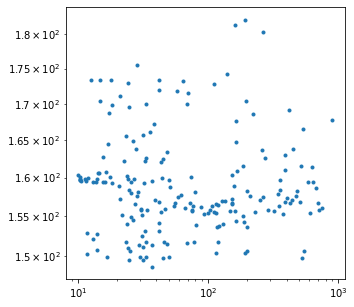

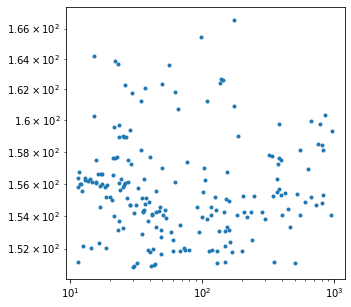

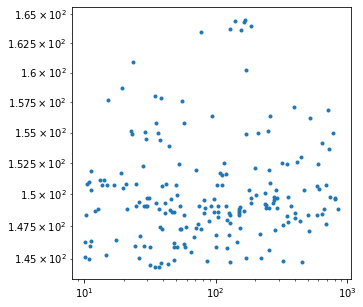

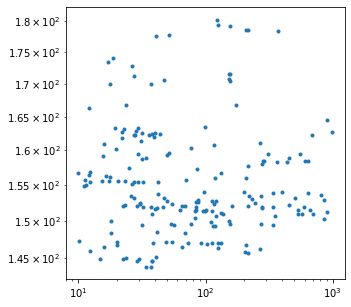

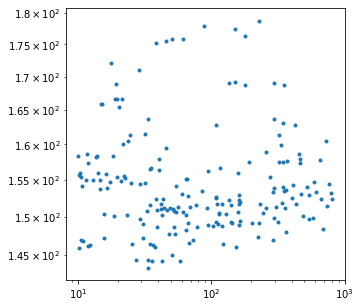

In [158]:
from sklearn.linear_model import LinearRegression
c=0
mnr2=0
mnmn = 0
cv = model_selection.KFold(n_splits=5)

for train_index, test_index in cv.split(predictors):
    mod = LinearRegression()
    X_train, X_test = predictors.iloc[train_index].values, predictors.iloc[test_index].values
    y_train, y_test = targets.iloc[train_index].values, targets.iloc[test_index].values
    
    X_train = X_train[:,4]
    X_test = X_test[:,4]
    isn = np.where(np.logical_not(np.isnan(X_train)))
    isn2 = np.where(np.logical_not(np.isnan(X_test)))
    mod = mod.fit(X_train[isn].reshape(-1,1),y_train[isn].reshape(-1,1))
    
    p = mod.predict((X_test[isn2].reshape(-1,1)))
    #e = np.mean((p - np.log(y_train[isn2]))**2)
    #p = np.exp(p) * 1#np.exp(e/2)
    fig,ax = plt.subplots(figsize=(5,5))
    #plt.plot(x,p,markersize=10)
    #plt.plot(a_rf[a_rf.columns[i]], np.float64(a_rf['CRONUS Erosion Rate (m My)']),'.')
    plt.plot(y_test[isn2],p,'.')
    r2 = metrics.r2_score(y_test[isn2], p)
    mn = metrics.median_absolute_error(y_test[isn2], p)

    mnr2 += r2
    mnmn += mn
    ax.set_yscale('log')
    ax.set_xscale('log')
    c+=1
print(mnr2/c)
print(mnmn/c)


    #ax.set_ylim([.])


In [159]:
from sklearn.linear_model import LinearRegression
mod = LinearRegression()
x=np.abs(X_train[:,4].reshape(-1,1))
mod = mod.fit(x,np.log(np.abs(y_train)))
p = mod.predict(x)
e = np.mean((p - np.log(y_train))**2)
p = np.exp(p) * np.exp(e/2)
fig,ax = plt.subplots(figsize=(5,5))
#plt.plot(x,p,markersize=10)
#plt.plot(a_rf[a_rf.columns[i]], np.float64(a_rf['CRONUS Erosion Rate (m My)']),'.')
plt.plot(np.log(y_train),np.log(p),'.')
print(metrics.r2_score(np.log(np.abs(p)),np.log(np.abs(y_train))))

ax.set_yscale('log')
#ax.set_ylim([.])
ax.set_xlabel(a_rf.columns[i])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [160]:
np.mean(y_train)

154.14595663265305